# About Dataset

Features:

RowNumber: The sequential number assigned to each row in the dataset.

CustomerId: A unique identifier for each customer.

Surname: The surname of the customer.

CreditScore: The credit score of the customer.

Geography: The geographical location of the customer (e.g., country or region).

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer has.

HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

EstimatedSalary: The estimated salary of the customer.

Exited: Indicates whether the customer has exited the bank (binary: yes/no).

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
sns.set()

2024-05-31 09:32:20.756255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 09:32:20.756377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 09:32:20.928535: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Business Understanding

In [2]:
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Penjelasan
Dari data yang kita import memiliki 10.000 baris dan 14 fitur (columns) dengan masing-masing memiiki typedata yang berbeda

In [3]:
# Menampilkan type data masing-masing fitur
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Penjelasan
Dari hasil diatas kita bisa melihat masing-masing tipe data fitur tersebut seperti int64, object, float64

In [4]:
# Menampilkan ringkasan data berbentuk tipe numerik menggunakan statistik
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Penjelasan
Menampilkan ringkasan dalam bentuk statistik seperti nilai min, max, persentil, mean, dan count khusus untuk fitur numerik

In [5]:
# Mengecek apakah ada nilai yang null di masing-masing fitur
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Mengetahui nilai jumlah unik dalam fitur Surname
data["Surname"].value_counts()

Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64

### Penjelasan
Terlihat bahwa pada fitur Surname memiliki banyak nilai yang unik tetapi jumlah nilai unik tertinggi yaitu Smith dengan nilai 32

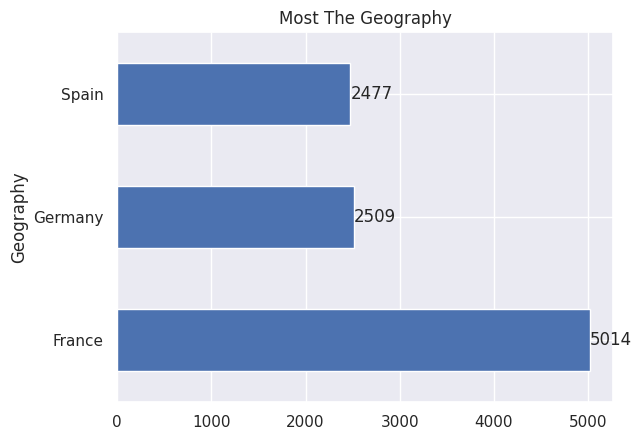

In [7]:
plot = data["Geography"].value_counts()
ax = plot.plot.barh()
ax.set_title("Most The Geography")

for container in ax.containers:
    ax.bar_label(container)

### Penjelasan
Dari hasil analisis tersebut kita bisa lihat bahwa, geography paling banyak ada di negara prancis dengan nilai 5014 dan paling rendah ada di spanyol dengan nilai 2477


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


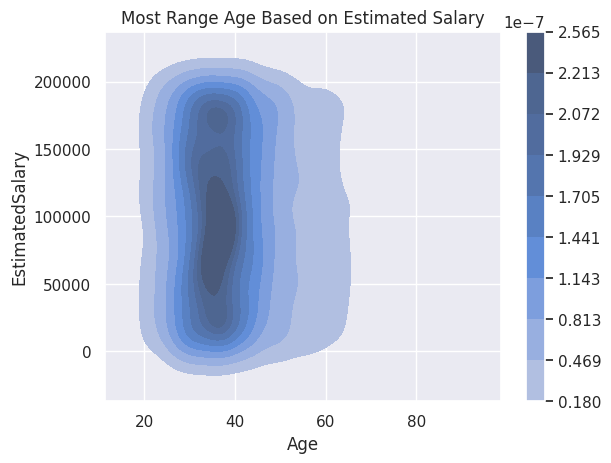

In [8]:
sns.kdeplot(data=data, x="Age", y="EstimatedSalary", cbar=True, fill=True).set(title="Most Range Age Based on Estimated Salary");

### Penjelasan
1. Terlihat bahwa perkiraan gaji paling banyak ada pada jangkauan umur 30 s/d 40 dengan 50.000 s/d 130.000 
2. Gaji paling tinggi juga masih tetap ada pada kisaran umur 30 s/d 40 dengan gaji diatas lebihdari 200.000

Note: Semakin warna biru tua maka nilai semakin tinggi artinya data point berkumpul di suatu titik tersebut, sedangkan warna semakin biru muda maka data point tersebar kemana-mana

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

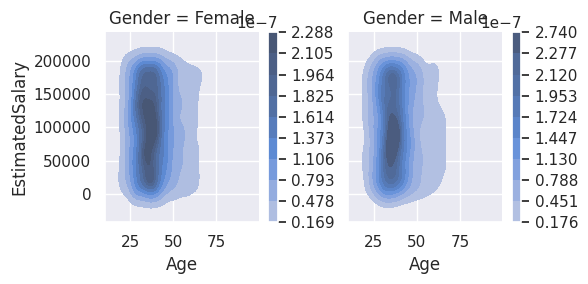

In [9]:
g = sns.FacetGrid(data, col="Gender")
g.map(sns.kdeplot, "Age", "EstimatedSalary", fill=True, cbar=True);

### Penjelasan
1. Pada jenis kelamin perempuan memiliki perikiraan gaji paling banyak ada pada umur 30 s/d 40 tahun dengan gaji rata-rata paling banyak sebesar 0 s/d 150.000
2. Pada jenis kelamin laki-laki memiliki perkiraan gaji paling banyak ada pada umur 30 s/d 40 tahun dengan gaji rata-rata paling banyak sebesar 50.000 s/d 120.000

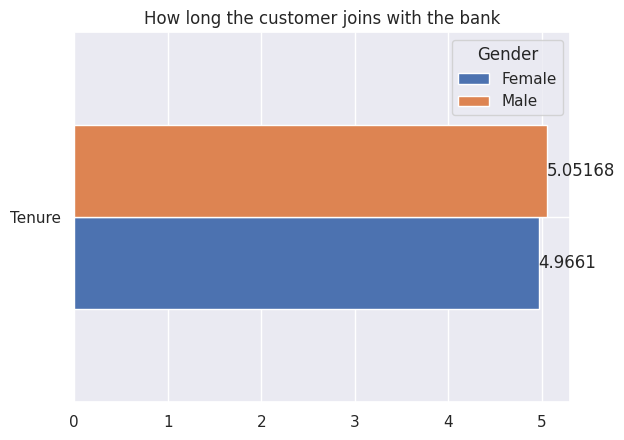

In [10]:
plot = pd.pivot_table(data=data, values="Tenure", columns="Gender", aggfunc="mean")
ax = plot.plot.barh()
ax.set_title("How long the customer joins with the bank")

for container in ax.containers:
    ax.bar_label(container)

### Penjelasan
Dari hasil analisis diatas kustomer paling banyak yang adalah pada jenis kelamin perempuan dengan rata-rata 5.05168

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

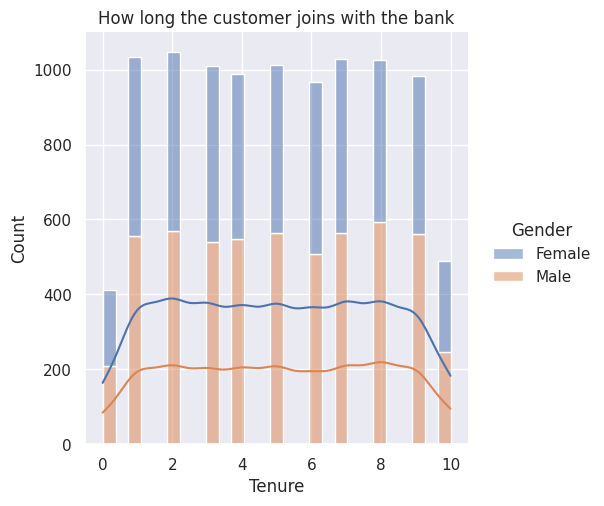

In [11]:
sns.displot(data=data, x="Tenure", hue="Gender", multiple="stack", kde=True).set(title="How long the customer joins with the bank");

### Penjelasan
Sama seperti penjelasan sebelumnya hanya saja disini menggunakan distribusi plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


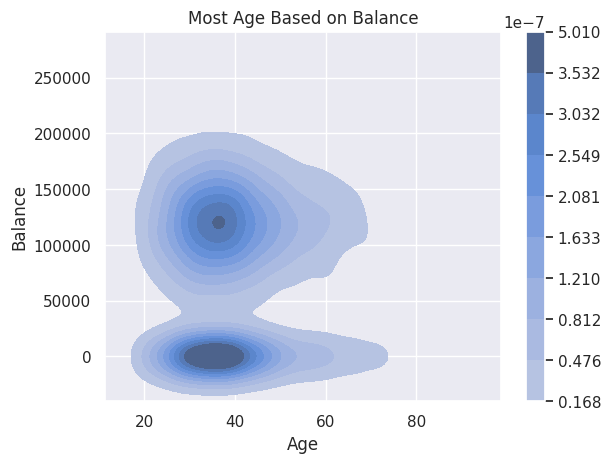

In [12]:
sns.kdeplot(data=data, x="Age", y="Balance", cbar=True, fill=True).set(title="Most Age Based on Balance");

### Penjelasan
1. Beradasarkan hasil diatas  terlihat bahwa isi ulang saldo bank ada pada umur 30 s/d 40 tahun dengan 0 saldo, hal ini mungkin di rentang umur tersebut orang lebih mementingkan menyimpan uang hasil gajiannya cash daripada di bank.
2. Isi ulang saldo bank yang paling banyak ada pada umur 32 s/d 35 tahun dengan saldo 120.000, hal ini mungkin di rentang umur tersebut orang lebih giat menabung di bank (kartu atm) daripada menyimpannya secara cash.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

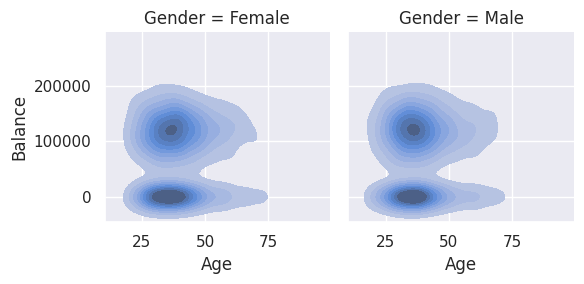

In [13]:
g = sns.FacetGrid(data, col="Gender")
g.map(sns.kdeplot, "Age", "Balance", fill=True);

### Penjelasan
1. Dari hasil analisis diatas yang paling banyak menyimpan uang ada pada perempuan rentang umur 30 s/d 40 tahun dengan jumlah saldonya 0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

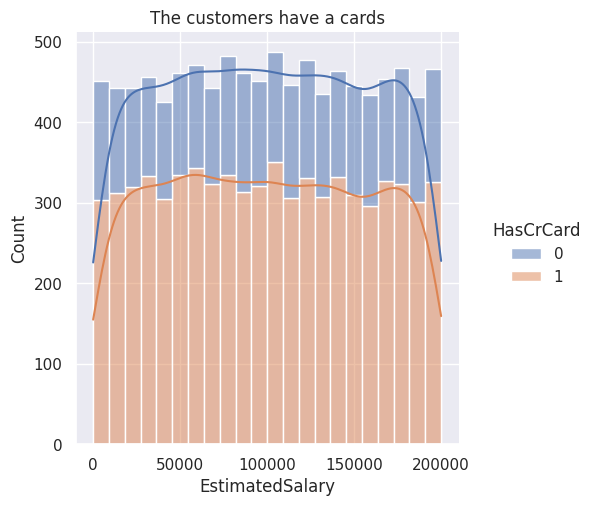

In [14]:
sns.displot(data=data, x="EstimatedSalary", hue="HasCrCard", multiple="stack", kde=True).set(title="The customers have a cards");

### Penjelasan
Dari hasil grafik diatas terlihat bahwa yang paling banyak adalah kustomer yang memiliki kredit dibandingkan kustomer yang tidak memiliki kredit 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


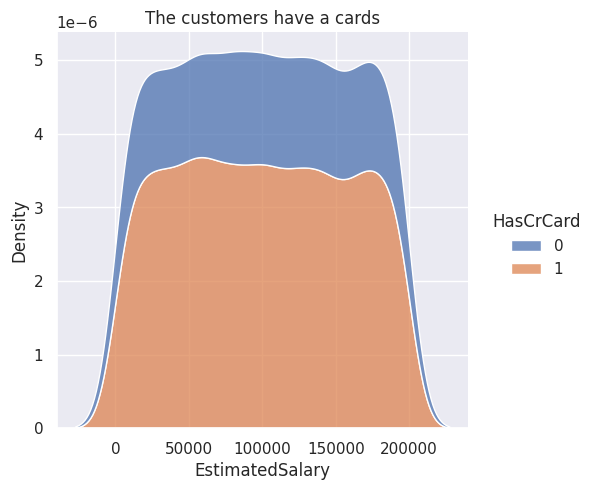

In [15]:
sns.displot(data=data, x="EstimatedSalary", hue="HasCrCard", multiple="stack", kind="kde").set(title="The customers have a cards");

### Penjelasan
Dari hasil grafik diatas terlihat bahwa yang paling banyak adalah kustomer yang memiliki kredit dibandingkan kustomer yang tidak memiliki kredit dalam bentuk kdeplot

In [16]:
# Umur 19 s/d 40 dewasa awal
# Umur 41 s/d 60 dewasa pertengahan
# Umur 61++ dewasa akhir

# Melakukan Binding data
bins = [19, 40, 60, 100]
labels = ["Early Adulthood", "Middle Adulthood", "Late Adulthood"]
data["AgeCategory"] = pd.cut(data["Age"], bins=bins, labels=labels)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle Adulthood
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle Adulthood
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle Adulthood
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Early Adulthood
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle Adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Early Adulthood
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Early Adulthood
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Early Adulthood
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Middle Adulthood


### Penjelasan
Kita akan melakukan binding data pada fitur Age, dengan masing-masing binding data memiliki rentang tersendiri:
1. Umur 19 s/d 40 dewasa awal atau dengan nilai fitur Early Adulthood
2. Umur 41 s/d 60 dewasa pertengahan atau dengan nilai fitur Middle Adulthood
3. Umur 61++ dewasa akhir atau dengan nilai fitur Late Adulthood

Artinya kita harus membuat sebuah fitur baru dengan nama AgeCategory, yang didalamnya berisi nilai fitur kategory seperti Early Adulthood, Middle Adulthood, dan Late Adulthood

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


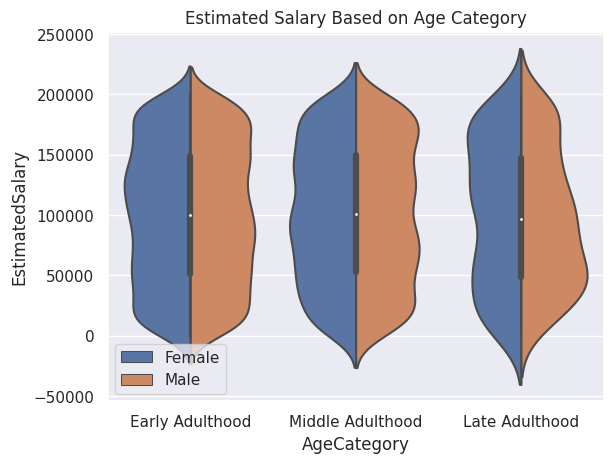

In [17]:
x = sns.violinplot(data=data, x="AgeCategory", y="EstimatedSalary", hue="Gender", split=True);
x.set_title("Estimated Salary Based on Age Category")
x.legend(loc="lower left");

### Penjelasan
Dari gambar violionplot diatas perkiraan gaji paling tinggi ada pada umur rentang 61 keatas, begitupula dengan gaji paling rendah.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


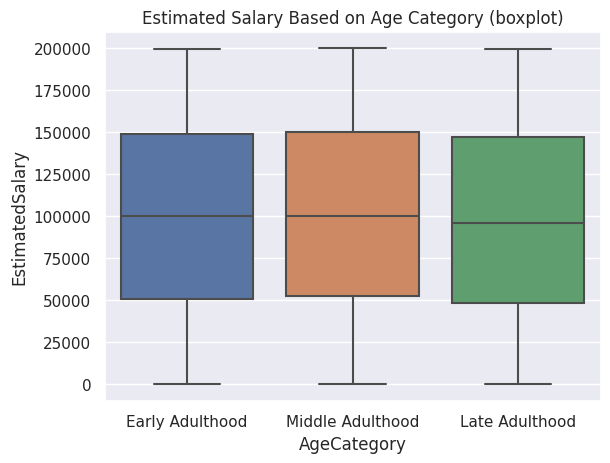

In [18]:
sns.boxplot(data=data, x="AgeCategory", y="EstimatedSalary").set(title="Estimated Salary Based on Age Category (boxplot)");

# Penjelasan
Sama penjelasan sebelumnya pada gambar violinplot, tetapi ini digambarkan kalau dalam bentuk boxplot

/tmp/ipykernel_35/442652896.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  plot = pd.pivot_table(data=data, values="IsActiveMember", columns="AgeCategory", aggfunc="mean")


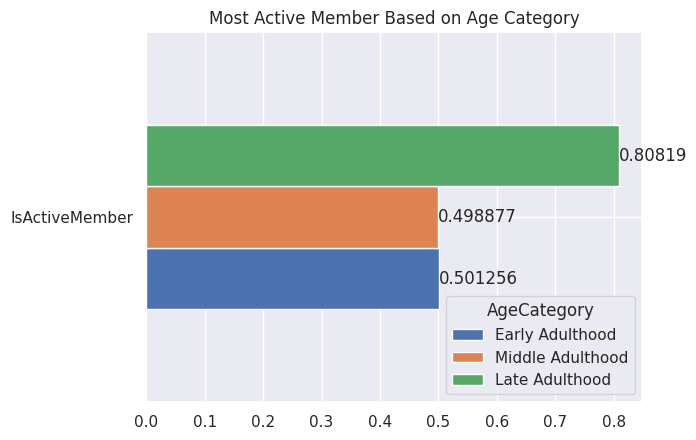

In [19]:
plot = pd.pivot_table(data=data, values="IsActiveMember", columns="AgeCategory", aggfunc="mean")
ax = plot.plot.barh()
ax.set_title("Most Active Member Based on Age Category")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
plot = data.groupby(["Gender", "AgeCategory"])["NumOfProducts"].mean().unstack()
ax = plot.plot.barh()
ax.set_title("Number of Products Based on Age Category and Gender")
ax.legend(loc="center left")

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
sns.displot(data=data, x="CreditScore", kde=True);

In [ ]:
data

# Data Understanding

In [ ]:
# Menghapus fitur yang tidak digunakan
data.drop(["RowNumber", "CustomerId", "Surname", "CreditScore", "Geography"], axis=1, inplace=True)
data

In [ ]:
def gender_map(x):
    if x == "Male":
        x = 0
    else:
        x = 1
    return x
data["Gender"] = data["Gender"].map(gender_map)
data

In [ ]:
def age_category_map(x):
    if x == "Early Adulthood":
        x = 0
    elif x == "Middle Adulthood":
        x = 1
    else:
        x = 2
    return x
data["AgeCategory"] = data["AgeCategory"].map(age_category_map)
data

In [ ]:
# Normalisasi data 0 s/d 1 value

# Fitur Age
age = MinMaxScaler()
age.fit(data[["Age"]])
data["Age"] = age.transform(data[["Age"]])

# Fitur Balance
balance = MinMaxScaler()
balance.fit(data[["Balance"]])
data["Balance"] = balance.transform(data[["Balance"]])

# Fitur EstimatedSalary
estimatedSalary = MinMaxScaler()
estimatedSalary.fit(data[["EstimatedSalary"]])
data["EstimatedSalary"] = estimatedSalary.transform(data[["EstimatedSalary"]])
data

In [ ]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="coolwarm", fmt=".1f")

# Modeling

In [ ]:
X = data.iloc[:, :8]
y = data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(f"X_train = {X_train.shape}, X_test = {X_test.shape}, y_train = {y_train.shape}, y_test = {y_test.shape}")

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred.reshape(-1, 1)

In [ ]:
pd.DataFrame({
    "aktual": y_test,
    "prediksi": y_pred
}).head(20)

# Evaluate

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy model random forest = {acc}")

In [ ]:
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
print(report)

In [ ]:
report_dict

In [ ]:
# Evaluate Cross Validation
def cross_validation(n_splits, model, X_train, y_train):
    acc = 0
    precision = 0
    recall = 0
    f1_score = 0
    kf = StratifiedKFold(n_splits=5)

    for fold, (train, val) in enumerate(kf.split(X=X_train, y=y_train)):
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(f"The fold is : {fold} : ")
        report = classification_report(y_test, y_pred)
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        print(report)
        roc_acc = roc_auc_score(y_test, y_pred)
        acc += roc_acc
        precision += report_dict["macro avg"]["precision"]
        recall += report_dict["macro avg"]["recall"]
        f1_score += report_dict["macro avg"]["f1-score"]
        print(f"The accuracy for fold {fold+1} : {roc_acc}")
        
    acc = acc / n_splits
    precision = precision / n_splits
    recall = recall / n_splits
    f1_score = f1_score / n_splits
    print(f"Average result accuracy model {model} is {acc}")
    print(f"Average result precision model {model} is {precision}")
    print(f"Average result recall model {model} is {recall}")
    print(f"Average result f1_score model {model} is {f1_score}")
    return f"{model}", acc, precision, recall, f1_score

In [ ]:
# Cross validation RandomForestClassifier model
model = RandomForestClassifier()
rf_model, rf_acc, rf_precision, rf_recall, rf_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

In [ ]:
# Cross validation LogisticRegression model
model = LogisticRegression()
lr_model, lr_acc, lr_precision, lr_recall, lr_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

In [ ]:
# Cross validation NaiveBayes model
model = GaussianNB()
nb_model, nb_acc, nb_precision, nb_recall, nb_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

In [ ]:
# Cross validation SVC model
model = SVC()
svc_model, svc_acc, svc_precision, svc_recall, svc_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

In [ ]:
# Cross validation KNClassifier model
model = KNeighborsClassifier()
kn_model, kn_acc, kn_precision, kn_recall, kn_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

In [ ]:
# Cross validation DecisionTree model
model = DecisionTreeClassifier()
dt_model, dt_acc, dt_precision, dt_recall, dt_f1_score = cross_validation(5, model, X_train=X_train, y_train=y_train)

In [ ]:
# Gabungkan semua hasil dari masing-masing model evaluasi sebelumnya kedalam pandas dataframe
pd.DataFrame({
    "accuracy": [rf_acc, lr_acc, svc_acc, nb_acc, kn_acc, dt_acc], 
    "precision": [rf_precision, lr_precision, svc_precision, nb_precision, kn_precision, dt_precision],
    "recall": [rf_recall, lr_recall, svc_recall, nb_recall, kn_recall, dt_recall],
    "f1_score": [rf_f1_score, lr_f1_score, svc_f1_score, nb_f1_score, kn_f1_score, dt_f1_score]
}, index=[rf_model, lr_model, svc_model, nb_model, kn_model, dt_model])

In [ ]:
# Evaluasi menggunakan teknik Grid Search kita menggunakan model RandomForestClassifier, 
# karena nilai akurasinya yang paling tinggi diatantara 5 model

model = RandomForestClassifier()
model.fit(X_train, y_train)

param_grid = [
    {"n_estimators":[10,20,30,40,50], "max_depth":[2,4,6,8,10]},
    {"bootstrap":[False], "n_estimators":[2,4,6,8], "max_depth":[2,4,6]}
]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_test, y_test)

In [ ]:
# Cetak hasilnya parameter terbaik
grid_search.best_params_

In [ ]:
# Kita buktikan kalau parameter tersebut memang terbaik di antara yang lain,
# yaitu dengan cara melihat nilai MSE (loss) yang paling terkecil 

cvres = grid_search.cv_results_
for mean_scores, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_scores), params)

In [ ]:
# Kita gunakan parameter terbaik yang sudah kita temukan

model_grid = RandomForestClassifier(n_estimators=30, max_depth=6)
model_grid.fit(X_train, y_train)

In [ ]:
y_pred_grid = model_grid.predict(X_test)

In [ ]:
acc_grid = accuracy_score(y_test, y_pred_grid)
print(f"Accuracy {acc_grid}")

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
grid_model = "Grid RandomForestClassifier()"
grid_acc = report_dict["accuracy"]
grid_precision = report_dict["macro avg"]["precision"]
grid_recall = report_dict["macro avg"]["recall"]
grid_f1_score = report_dict["macro avg"]["f1-score"]

In [ ]:
# Gabungkan semua hasil dari masing-masing model evaluasi sebelumnya kedalam pandas dataframe
# kemudian kita tambahkan model grid RandomForestClassifier model
pd.DataFrame({
    "accuracy": [rf_acc, lr_acc, svc_acc, nb_acc, kn_acc, dt_acc, grid_acc], 
    "precision": [rf_precision, lr_precision, svc_precision, nb_precision, kn_precision, dt_precision, grid_precision],
    "recall": [rf_recall, lr_recall, svc_recall, nb_recall, kn_recall, dt_recall, grid_recall],
    "f1_score": [rf_f1_score, lr_f1_score, svc_f1_score, nb_f1_score, kn_f1_score, dt_f1_score, grid_f1_score]
}, index=[rf_model, lr_model, svc_model, nb_model, kn_model, dt_model, grid_model]).sort_values(by="accuracy", ascending=False)

In [ ]:
# Pola 
# | TP  | FP |
# | FN  | TN |
con_mat = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(con_mat, annot=True, fmt=".5g").set(title="Confusion Matrix");

In [ ]:
# Kita bandingkan hasil prediksi model dengan nilai aktual
pd.DataFrame({
    "y_aktual": y_test,
    "y_pred": y_pred_grid
}).head(20)

In [ ]:
# Menggunakan Deep Learning
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)

model_deep = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(len(X_test.columns),)),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

optimizer = tf.keras.optimizers.Adam()
model_deep.compile(optimizer=optimizer,
              loss="binary_crossentropy", metrics=["acc"]              
)

history = model_deep.fit(X_train.values, y_train, validation_data=(X_test, y_test), callbacks=[es], epochs=100)

In [ ]:
fig, ax = plt.subplots()
plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
ax.set_title("Accuracy Training Result")
plt.legend();

In [ ]:
fig, ax = plt.subplots()
plt.plot(history.history["loss"], label="acc")
plt.plot(history.history["val_loss"], label="val_loss")
ax.set_title("Loss Training Result")
plt.legend();

In [ ]:
# Kita tampilkan  model evaluasi akurasi dan loss dari hasil training
loss, acc_deep = model_deep.evaluate(X_test, y_test)
print(f"Loss = {loss}")
print(f"Accuracy = {acc_deep}")

In [ ]:
# Kita bandingkan accuracy antara model random forest grid dengan model deep learning
pd.DataFrame({
    "Random Forest Grid": [acc_grid],
    "Deep Learning": [acc_deep]
}, index=["accuracy"])

In [ ]:
y_pred_deep = model_deep.predict(X_test)

In [ ]:
# Ubah bentuk array 2D kedalam array 1D (vektor)
y_pred_deep = y_pred_deep.round().flatten()
y_pred_deep

In [ ]:
pd.DataFrame({
    "y_aktual":y_test,
    "y_pred_deep":y_pred_deep.astype("int32")
}).head(20)

In [ ]:
con_max_deep = confusion_matrix(y_test, y_pred_deep)
sns.heatmap(con_max_deep, annot=True, cmap="Blues", fmt=".5g").set(title="Confusion Matrix using Deep Learning");

In [ ]:
pd.DataFrame({
    "y_aktual": y_test,
    "y_model_grid_random_forest": y_pred_grid,
    "y_pred_deep": y_pred_deep.astype("int32")
}).head(20)

In [ ]:
# Kita bandingkan akurasi semua model yang sebelumnya sudah ada dengan model deep learning.
pd.DataFrame({
    "RandomForestClassifier": rf_acc,
    "LogisticRegression": lr_acc,
    "SVC": svc_acc,
    "GaussianNB": nb_acc,
    "KNeighborClassifier": kn_acc,
    "DecisionTreeClassifier": dt_acc,
    "Grid RandomForestClassifier": grid_acc,
    "DeepLearning": acc_deep
}, index=["accuracy"]).T.sort_values(by="accuracy", ascending=False)